In [1]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filePath = 'PROSTATA_1.MR.0001.0015.2021.12.22.13.14.21.169473.39474333.ima'

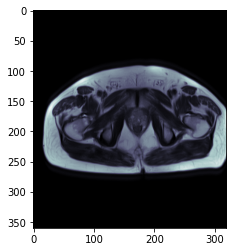

In [3]:

#img = pydicom.read_file(filePath)
img = pydicom.dcmread(filePath)
plt.imshow(img.pixel_array,cmap=plt.cm.bone)
plt.show()


In [4]:
print(img)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 184
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.2.43.166050.30010021122216083096600000020
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.12.2.1107.5.2
(0002, 0013) Implementation Version Name         SH: 'MR_VE11C'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']
(0008, 0012) Instance Creation Date              DA: '20210922'
(0008, 0013) Instance Creation Time              TM: '114406.645000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SO

In [7]:
img = img.pixel_array

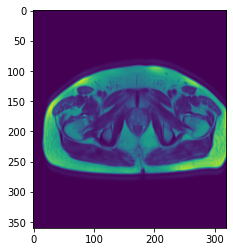

In [46]:
plt.imshow(img.pixel_array)

In [9]:
img = exposure.rescale_intensity(img,in_range="image",out_range=(0,1))

In [3]:
from skimage import io,viewer,exposure
from skimage.viewer.plugins.lineprofile import LineProfile
from skimage.viewer.plugins import Plugin
from skimage.viewer.widgets import Slider


img = io.imread(filePath,as_gray=True)
img.shape
img = exposure.rescale_intensity(img,in_range="image",out_range=(0,1))
#viewer = viewer.ImageViewer(img)
#viewer+=LineProfile(maxdist=100)
#viewer.show()[0]

C:\Users\Pier\AppData\Local\Programs\Python\Python39\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


In [4]:
print(img.pixel_array.shape)
print("max: ",img.pixel_array.max(),"\nmin: ",img.pixel_array.min())
np.mean(img.pixel_array)

AttributeError: 'numpy.ndarray' object has no attribute 'pixel_array'

In [18]:
flat = img.pixel_array.flatten()
print(flat)

[0 0 0 ... 0 0 0]


In [50]:
np.histogram(img.pixel_array,bins=10)

(array([77203, 11305,  5050,  4414,  5375,  4497,  3932,  2502,   832,
           90], dtype=int64),
 array([   0. ,  293.3,  586.6,  879.9, 1173.2, 1466.5, 1759.8, 2053.1,
        2346.4, 2639.7, 2933. ]))

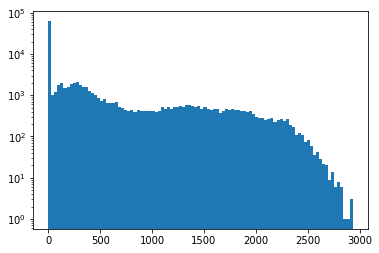

In [58]:

plt.hist(flat,bins=100,log=True,histtype="stepfilled")
plt.savefig('histograma.png')
plt.show()

In [60]:
from skimage.filters.rank import gradient
from skimage.morphology import disk

In [11]:
io.imsave("images\original.png",img)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [ ]:
out = gradient(img, disk(1))
io.imsave("bordes.png",out)
fig, ax = plt.subplots(figsize=(9, 9))
ax.imshow(out,cmap="gray")
